<a href="https://colab.research.google.com/github/Ludwig018/PM-Vehicles-/blob/main/PAMLP_VCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Imported the necessary libraries such as pandas, numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Libraries to be utilized for the linear regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#Libraries to be utilised for the classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#Libraries to be utilised for the clustering model(KMeans)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
#To load the excel data into a dataframe
df=pd.read_excel("vehicle_maintenance_data.xlsx")

#To display the first five rows of the dataframe
df.head()

#To display last five rows of the dataframe
df.tail()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
49995,Car,77229,Good,3,6,Diesel,Automatic,2500,97404,2023-11-24,2025-09-15,Third,5217,4,1,10357297612491700,New,Good,Weak,1
49996,Truck,54742,Good,4,4,Diesel,Manual,800,13421,2023-07-14,2025-01-21,Second,15856,4,1,14924022313226600,Worn Out,New,Good,1
49997,Van,75601,Poor,0,4,Electric,Automatic,1500,124851,2023-09-09,2024-11-09,First,6019,10,0,19859242771519400,Worn Out,Worn Out,Weak,1
49998,Car,66181,Good,1,7,Electric,Manual,2500,103182,2023-08-26,2025-05-22,Third,5030,4,3,10720555018735800,New,Good,Weak,1
49999,Car,71605,Poor,0,10,Petrol,Manual,2000,65721,2023-07-25,2024-06-06,Third,9171,6,3,16328944821526600,Good,New,Good,0


In [ ]:
#To check for missing values
df.isna()

#To check for missing values(This is used intechangeably with isna())
df.isnull()

# To check for the sum of missing values
df.isnull().sum()

# To check for a descriptive statistics about the dataframe
df.describe()

#To give a summary of the dataframe(such as the datatypes etc)
df.info()

# To check for duplicated values in the dataframe
df.duplicated()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vehicle_Model         50000 non-null  object        
 1   Mileage               50000 non-null  int64         
 2   Maintenance_History   50000 non-null  object        
 3   Reported_Issues       50000 non-null  int64         
 4   Vehicle_Age           50000 non-null  int64         
 5   Fuel_Type             50000 non-null  object        
 6   Transmission_Type     50000 non-null  object        
 7   Engine_Size           50000 non-null  int64         
 8   Odometer_Reading      50000 non-null  int64         
 9   Last_Service_Date     50000 non-null  datetime64[ns]
 10  Warranty_Expiry_Date  50000 non-null  datetime64[ns]
 11  Owner_Type            50000 non-null  object        
 12  Insurance_Premium     50000 non-null  int64         
 13  Service_History 

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [ ]:
# To fill the missing values with appropriate(Even though there were no missing values)
df.fillna({
    'Vehicle_Model': 'Unknown', 'Maintenance_History': 'Unknown', 'Reported_Issues': 0, 'Vehicle_Age': df['Vehicle_Age'].median(),
    'Fuel_Type': 'Unknown', 'Transmission_Type': 'Unknown', 'Engine_Size': df['Engine_Size'].median(),'Odometer_Reading': df['Odometer_Reading'].median(),
    'Last_Service_Date': pd.Timestamp('today'), 'Warranty_Expiry_Date': pd.Timestamp('today'), 'Owner_Type': 'Unknown', 'Insurance_Premium': df['Insurance_Premium'].median(),
    'Service_History': df['Service_History'].median(), 'Accident_History': 0, 'Fuel_Efficiency': df['Fuel_Efficiency'].median(), 'Tire_Condition': 'Unknown',
    'Brake_Condition': 'Unknown', 'Battery_Status': 'Unknown', 'Need_Maintenance': 0}, inplace=True)
df.isnull()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# To remove duplicates(Drop duplicate rows if any; Even though there were no duplicated values))
df.drop_duplicates(inplace=True)
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [ ]:
# To convert date columns to datetime format
df[['Last_Service_Date', 'Warranty_Expiry_Date']] = df[['Last_Service_Date', 'Warranty_Expiry_Date']].apply(pd.to_datetime, format='%d.%m.%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vehicle_Model         50000 non-null  object        
 1   Mileage               50000 non-null  int64         
 2   Maintenance_History   50000 non-null  object        
 3   Reported_Issues       50000 non-null  int64         
 4   Vehicle_Age           50000 non-null  int64         
 5   Fuel_Type             50000 non-null  object        
 6   Transmission_Type     50000 non-null  object        
 7   Engine_Size           50000 non-null  int64         
 8   Odometer_Reading      50000 non-null  int64         
 9   Last_Service_Date     50000 non-null  datetime64[ns]
 10  Warranty_Expiry_Date  50000 non-null  datetime64[ns]
 11  Owner_Type            50000 non-null  object        
 12  Insurance_Premium     50000 non-null  int64         
 13  Service_History 

In [ ]:
# Columns to be converted into category data type
category_columns = [
    'Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type',
    'Owner_Type', 'Tire_Condition', 'Brake_Condition', 'Battery_Status'
]

# To convert the specified columns into category data type
df[category_columns] = df[category_columns].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vehicle_Model         50000 non-null  category      
 1   Mileage               50000 non-null  int64         
 2   Maintenance_History   50000 non-null  category      
 3   Reported_Issues       50000 non-null  int64         
 4   Vehicle_Age           50000 non-null  int64         
 5   Fuel_Type             50000 non-null  category      
 6   Transmission_Type     50000 non-null  category      
 7   Engine_Size           50000 non-null  int64         
 8   Odometer_Reading      50000 non-null  int64         
 9   Last_Service_Date     50000 non-null  datetime64[ns]
 10  Warranty_Expiry_Date  50000 non-null  datetime64[ns]
 11  Owner_Type            50000 non-null  category      
 12  Insurance_Premium     50000 non-null  int64         
 13  Service_History 

In [ ]:
#The columns to be converted and their target types(numeric data type)
convert_dict = {
    'Reported_Issues': int, 'Vehicle_Age': int,'Engine_Size': int,'Odometer_Reading': int,'Insurance_Premium': float,
    'Service_History': int,'Accident_History': int,'Fuel_Efficiency': float,'Need_Maintenance': int
}

# To convert the specified columns to their appropriate data types
df = df.astype(convert_dict)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vehicle_Model         50000 non-null  category      
 1   Mileage               50000 non-null  int64         
 2   Maintenance_History   50000 non-null  category      
 3   Reported_Issues       50000 non-null  int64         
 4   Vehicle_Age           50000 non-null  int64         
 5   Fuel_Type             50000 non-null  category      
 6   Transmission_Type     50000 non-null  category      
 7   Engine_Size           50000 non-null  int64         
 8   Odometer_Reading      50000 non-null  int64         
 9   Last_Service_Date     50000 non-null  datetime64[ns]
 10  Warranty_Expiry_Date  50000 non-null  datetime64[ns]
 11  Owner_Type            50000 non-null  category      
 12  Insurance_Premium     50000 non-null  float64       
 13  Service_History 

In [ ]:
# The cleaned data is displayed to verify the changes
print("Cleaned Data:")
print(df.head())

# To save the cleaned DataFrame to a new Excel file[necessary]
df.to_excel("cleaned_vehicle_maintenance_data.xlsx", index=False)

Cleaned Data:
  Vehicle_Model  Mileage Maintenance_History  Reported_Issues  Vehicle_Age  \
0         Truck    58765                Good                0            4   
1           Van    60353             Average                1            7   
2           Bus    68072                Poor                0            2   
3           Bus    60849             Average                4            5   
4           Bus    45742                Poor                5            1   

  Fuel_Type Transmission_Type  Engine_Size  Odometer_Reading  \
0  Electric         Automatic         2000             28524   
1  Electric         Automatic         2500            133630   
2  Electric         Automatic         1500             34022   
3    Petrol         Automatic         2500             81636   
4    Petrol            Manual         2000             97162   

  Last_Service_Date Warranty_Expiry_Date Owner_Type  Insurance_Premium  \
0        2023-11-23           2025-06-24     Second       

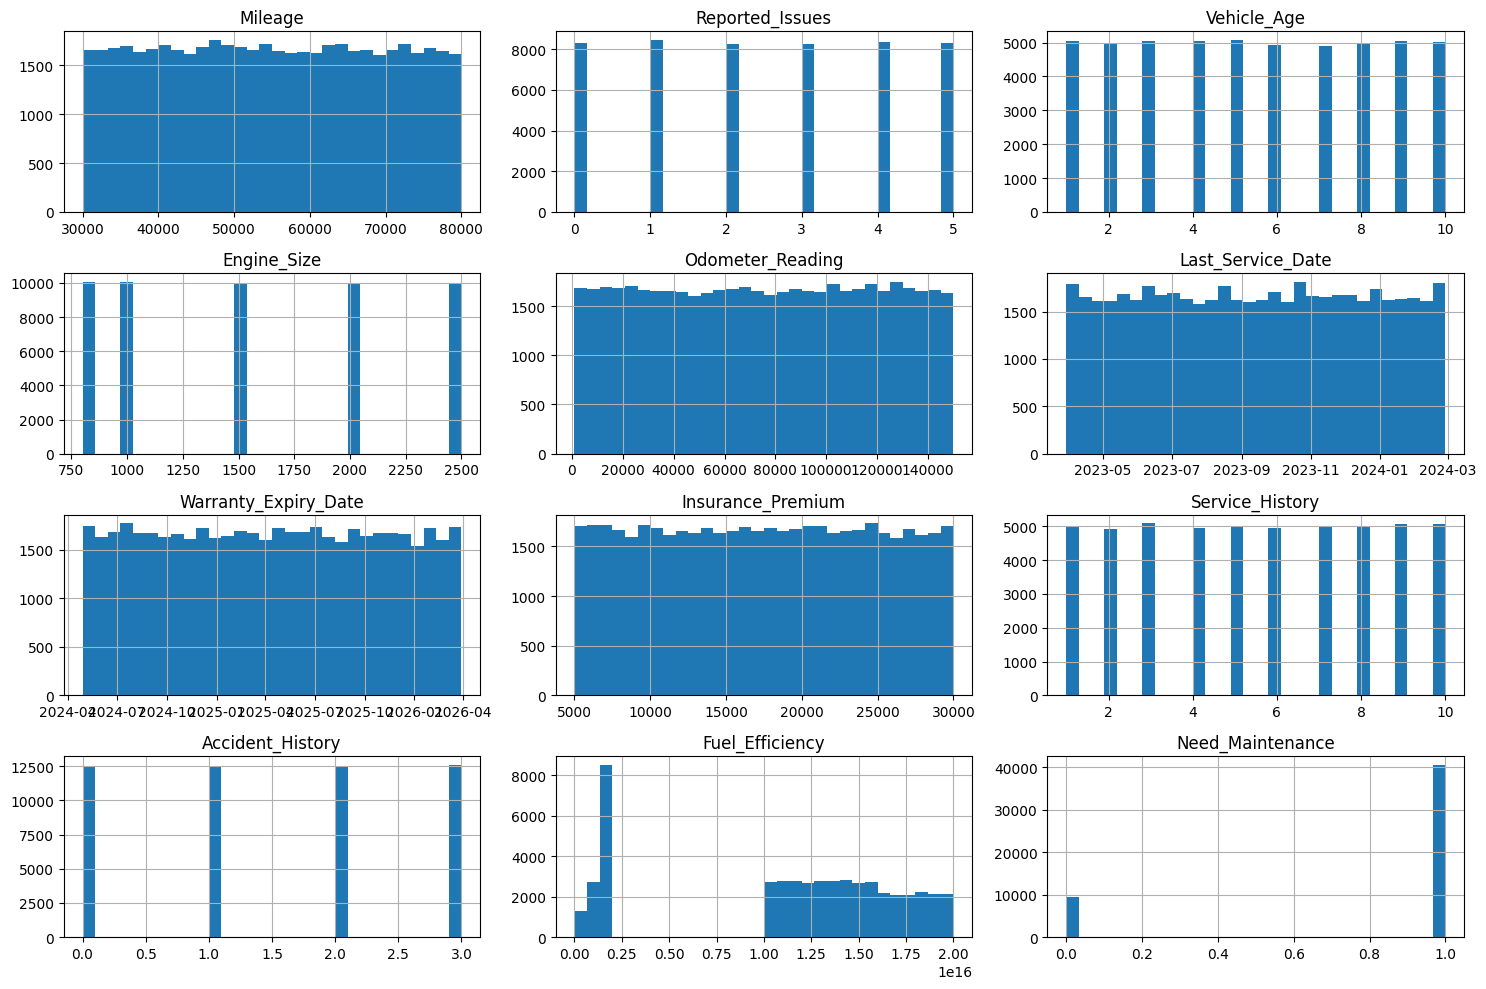

In [ ]:
# To plot histogram for all numerical columns of the vehicle maintenance datasets
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

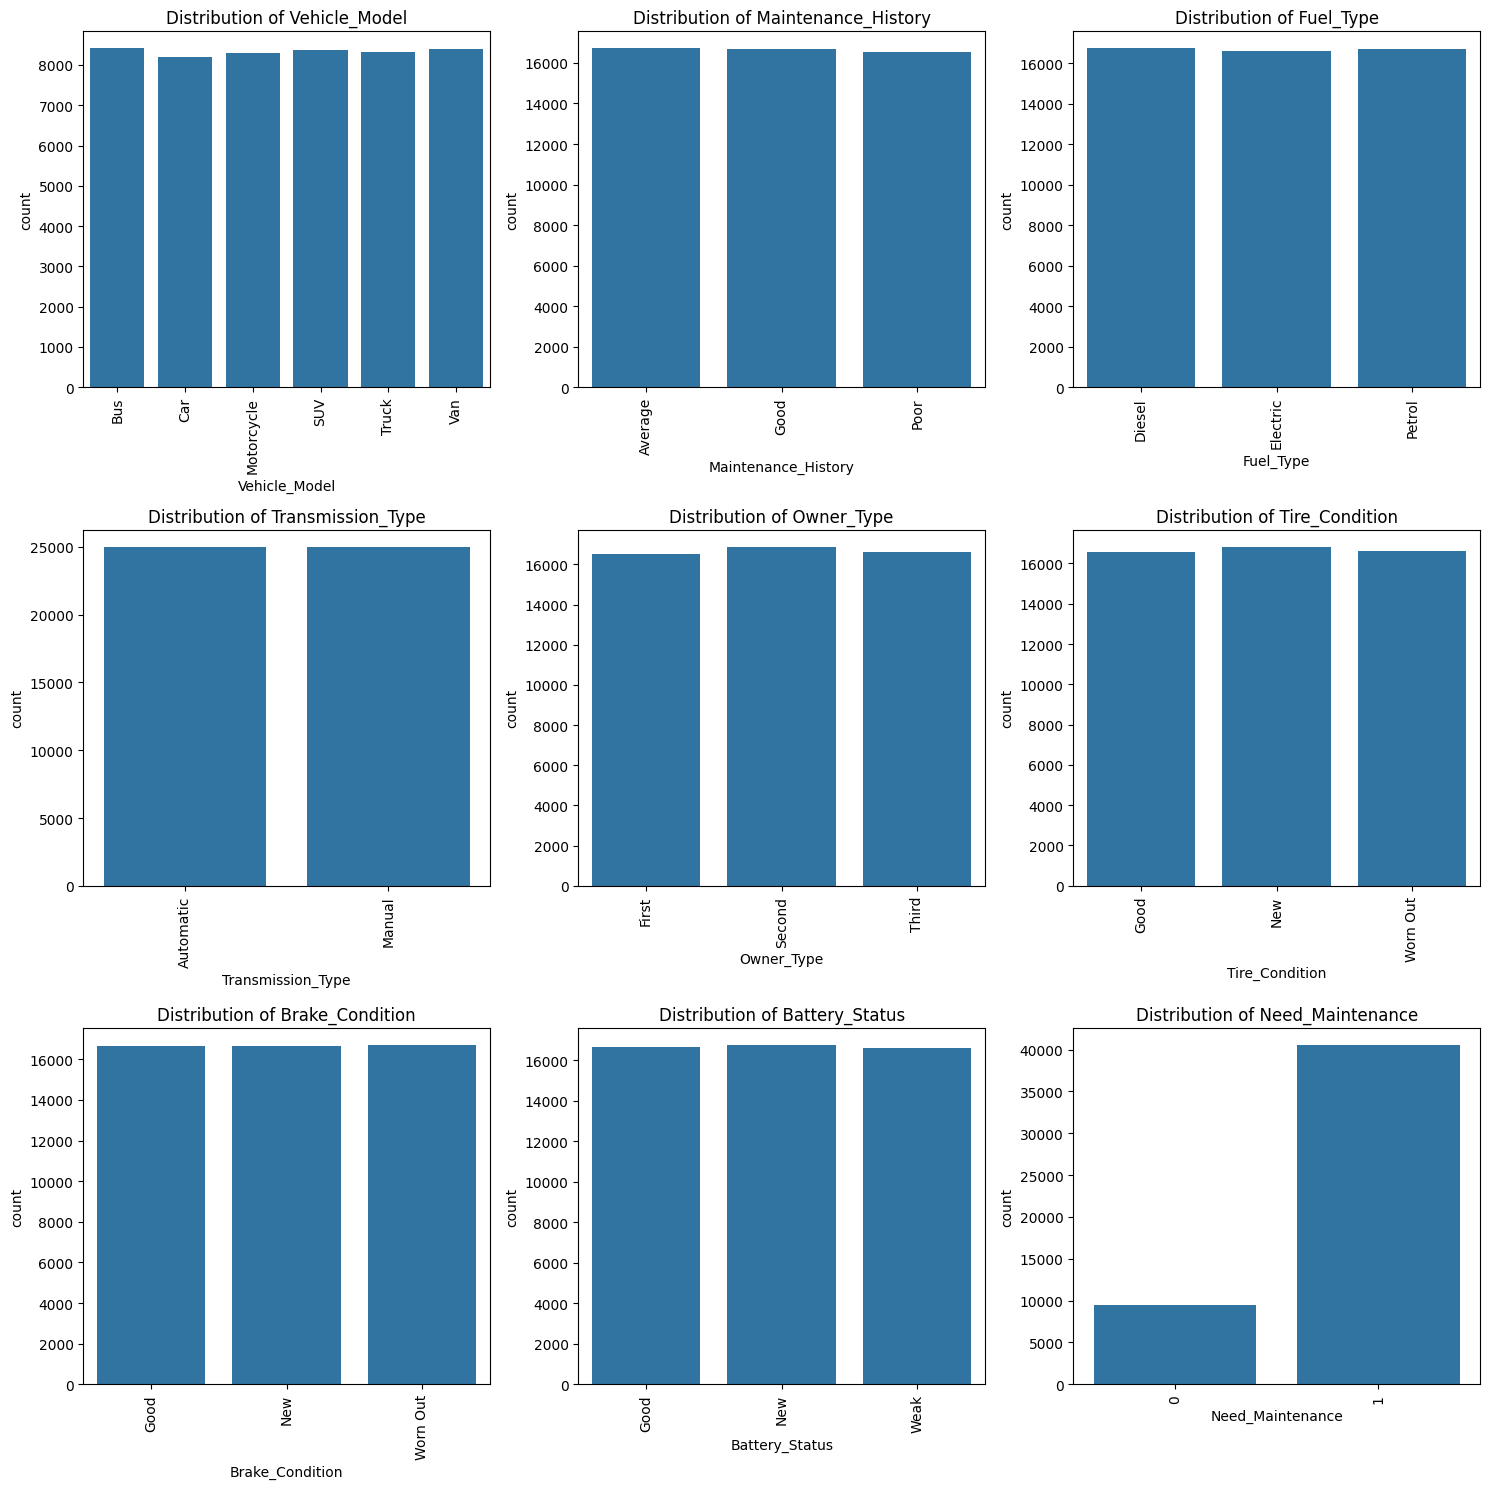

In [ ]:
#To plot bar chart for the categorical features

#A list of all categorical columns to be plotted
categorical_columns = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type', 'Owner_Type', 'Tire_Condition', 'Brake_Condition', 'Battery_Status', 'Need_Maintenance']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

#To create subplots for the barchart
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {column}')
    axes[i//3, i%3].tick_params(axis='x', rotation=90)

#To display the count plot for each categorical column
plt.tight_layout()
plt.show()


In [ ]:
# To convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

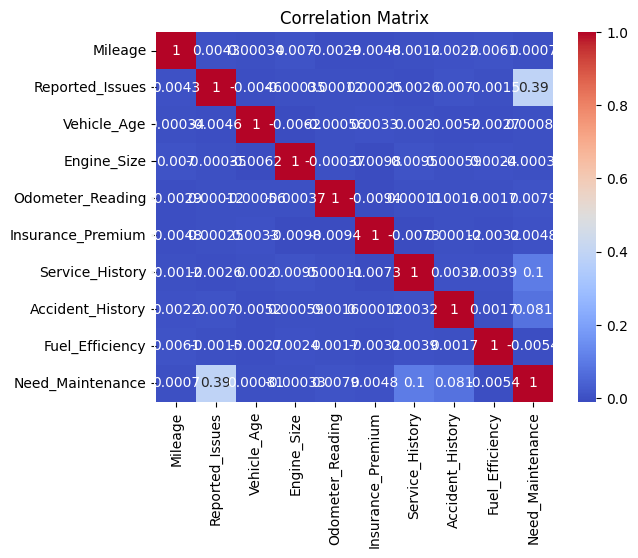

In [ ]:
# Selecting the numeric columns only
numeric_df = df.select_dtypes(include=[float, int])

# To compute the correlation matrix
corr = numeric_df.corr()

# To plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

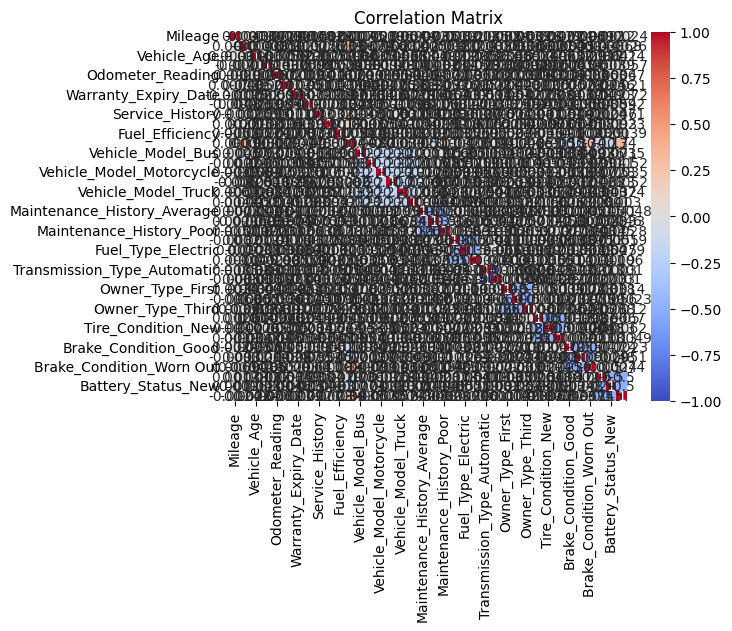

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

# Compute the correlation matrix
corr = df_encoded.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Linear Regression
#Using only numerical columns of the dataset
numerical_df = df.select_dtypes(include=['int64', 'float64'])

print("The Numerical DataFrame columns:")
print(numerical_df.columns)

# To perform Features and target variable for regression
X_reg = numerical_df.drop('Insurance_Premium', axis=1)  # Independent variables (features)
y_reg = numerical_df['Insurance_Premium']  # Dependent variable (target)

# To split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# To initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_reg, y_train_reg)

# To perform predictions and evaluation
y_pred_reg = linear_reg.predict(X_test_reg)

# To display the evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_reg))

The Numerical DataFrame columns:
Index(['Mileage', 'Reported_Issues', 'Vehicle_Age', 'Engine_Size',
       'Odometer_Reading', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Need_Maintenance'],
      dtype='object')
Mean Squared Error: 52685363.844903596
R-squared: 1.0238060483169775e-05


In [ ]:
#Libraries to be utilised for feature selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE


# To split the data into features and target
X = df[['Mileage', 'Reported_Issues', 'Vehicle_Age', 'Engine_Size', 'Odometer_Reading', 'Service_History', 'Accident_History', 'Fuel_Efficiency', 'Need_Maintenance']]
y = df['Insurance_Premium']

# To standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# To initialize the linear regression model
lr = LinearRegression()

# Use RFE with cross-validation to select the best features
# Start with all features and eliminate them one by one
n_features_to_select = 1  # We want to select all features in a recursive manner
rfe = RFE(estimator=lr, n_features_to_select=n_features_to_select, step=1)
rfe.fit(X_scaled, y)

# Display the ranking of features
print("Feature ranking:")
print(rfe.ranking_)

# To get the optimal number of features and their names
optimal_num_features = np.where(rfe.ranking_ == 1)[0].size
selected_features = X.columns[np.where(rfe.support_ == True)[0]]
print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected features: {selected_features}")

Feature ranking:
[5 8 6 1 2 3 9 7 4]
Optimal number of features: 1
Selected features: Index(['Engine_Size'], dtype='object')


In [ ]:
# To perform feature selection
selected_features = ['Engine_Size']
X_selected = X[selected_features]

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# To initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# To predict on the test set
y_pred = lr.predict(X_test)

# To calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# This is to perform cross-validation
cv_scores = cross_val_score(lr, X_selected, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}")

# To get the coefficients of the model
coefficients = lr.coef_
feature_importance = pd.DataFrame({'Feature': selected_features, 'Coefficient': coefficients})
print(feature_importance)


Mean Squared Error: 52693064.087938584
Root Mean Squared Error: 7258.99883509693
R-squared: -0.00013591570286775045
Cross-Validation RMSE: 7223.230567727876 ± 36.547828780541074
       Feature  Coefficient
0  Engine_Size    -0.132491


In [ ]:
#Random Forest Classifier (Classification)
# To convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

# The features and target variable for the classification
X_cls = df_encoded.drop('Need_Maintenance', axis=1)  # Independent variables (features)
y_cls = df_encoded['Need_Maintenance']  # Dependent variable (target)

# T split the data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# To initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# To fit the model on the training data
rf_classifier.fit(X_train_cls, y_train_cls)

# To perform predictions
y_pred_cls = rf_classifier.predict(X_test_cls)

# T evaluate the model
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))


Random Forest Classifier Metrics:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00      8085

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
# Normalize/scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# DataFrame of scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

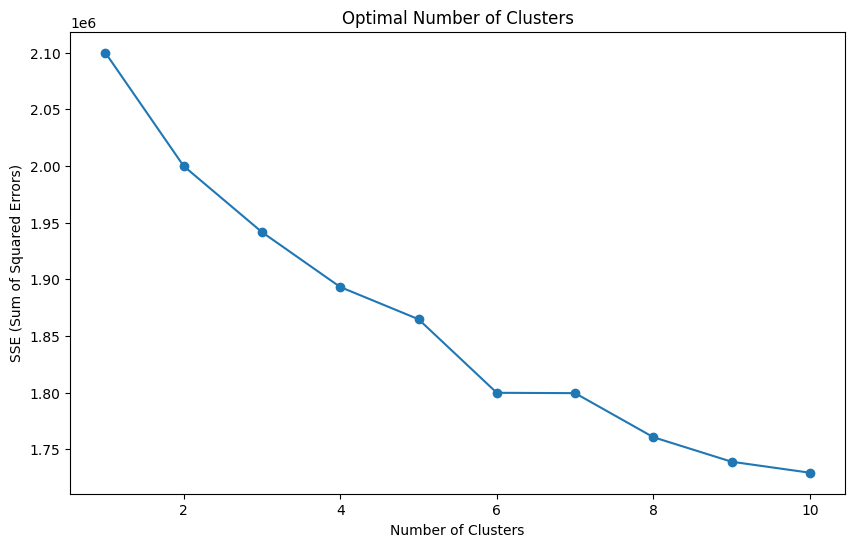

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#KMeans Clustering
# For loop to determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# To plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Optimal Number of Clusters')
plt.show()

# Chose the number of clusters
optimal_clusters = 3

# To initialize and fit the K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


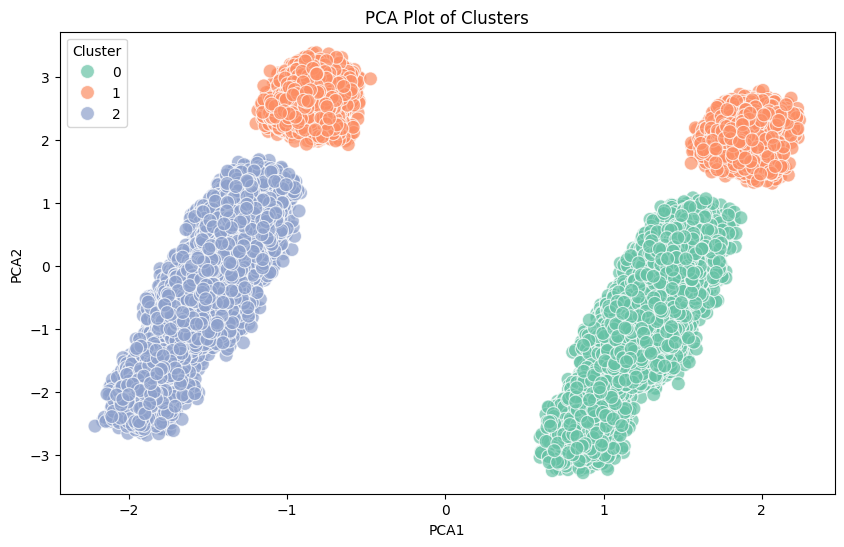

In [ ]:
# To reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# To create a DataFrame with the PCA components and cluster labels
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# To plot the PCA components with cluster coloring
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('PCA Plot of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()